1. К алгоритму kNN, реализованному на уроке, реализовать добавление весов для соседей в зависимости от номера соседа.
2. К алгоритму kNN, реализованному на уроке, реализовать добавление весов для соседей в зависимости от расстояния до соседа.  Сравнить метрики качества и сложность разделяющей гиперплоскости. **Сделать выводы.**
3. Настроить оптимальное значение числа соседей для моделей из п.1 и п.2, сделать выводы.
4. **(опция).** Написать функцию подсчета метрики качества кластеризации как среднее квадратичное внутриклассовое расстояние и построить график ее зависимости от количества кластеров k (взять от 1 до 10) для выборки данных из данного урока (создать датасет, как в методичке).

---

In [70]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris, make_classification
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.datasets import make_blobs
import random

1-3). Уйдем от реализации алгоритма через функцию и реализуем класс `KNN` со всеми необходимыми методами.<br>
В качестве гиперпараметров укажем не только количество соседей, но и способ выставления веса соседям (вес уменьшается пропорционально рангу `index` или расстоянию до данной точки `distance`):

In [3]:
class KNN:
    def __init__(self, k_nearest=5, weights_by='None'):
        self.__k_nearest = k_nearest + (1 if weights_by in ['index', 'distance'] else 0)
        self.__weights_by = weights_by
    def fit(self, X, y):
        self.__X = X
        self.__y = y
        if self.__k_nearest > y.shape[0]:
            self.__k_nearest = y.shape[0]

    
    def predict(self, X):
        pred = np.array([]).astype('int')
        for row in X: # Как можно избавиться в данном случае от цикла?
            distance = ((row - self.__X)**2).sum(1)
            ind = np.argpartition(distance, self.__k_nearest)[:self.__k_nearest]
            ind = ind[np.argsort(distance[ind])]
            
            if self.__weights_by == 'index':
                weights = np.indices(ind.shape)[0, ::-1]
            elif self.__weights_by == 'distance':
                weights = (distance[ind].max() - distance[ind])
            elif self.__weights_by == 'None':
                weights = np.ones_like(ind)
            else:
                raise AttributeError('weights_by must be in ''index'', ''distance'', ''None''')
                
            res = np.vstack((ind, self.__y[ind], weights))[1:].T
            
            df_res = pd.DataFrame(res, columns=['key', 'value'])
            df_agg = df_res.groupby('key').sum('value')            
            
            pred = np.append(pred, df_agg.idxmax())
        return pred
            
    
    def fit_predict(self, X, y):
        self.fit(X, y)
        pred = self.predict(X)
        return pred

*P.S. Как видно, метод `predict` оперирует с циклом. Хочется узнать, как можно избавиться от этого.*

In [69]:
# код из методички
def get_graph(X_train, y_train, k, cmap, model, h=.1):
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF', '#ebebe8'])

    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    start = time.time()
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    print('Drawing time:', time.time() - start)
    Z = np.array(Z).reshape(xx.shape)
    plt.figure(figsize=(7,7))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f"Трехклассовая kNN классификация при k = {k}")
    plt.show()

def accuracy(pred, y):
    return (sum(pred == y) / len(y))

In [46]:
X, y = load_iris(return_X_y=True)
X = X[:, :2]

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

Для разного количества соседей построим разные модели и сравним их эффективность и особенности:

Accuracy: 0.71053
Drawing time: 15.414953708648682


<ipython-input-62-734e8efb690c>:38: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


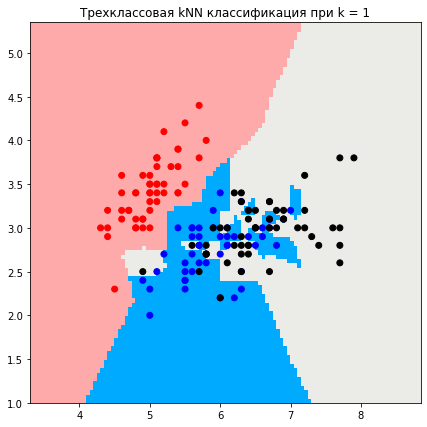

In [63]:
k_n = 1
model = KNN(k_n, 'distance')
model.fit(X_train, y_train)
pred = model.predict(X_test)
print(f'Accuracy: {round(accuracy(pred, y_test), 5)}')
get_graph(X, y, k_n, cmap, model, h=0.05)

Accuracy: 0.76316
Drawing time: 15.325201511383057


<ipython-input-62-734e8efb690c>:38: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


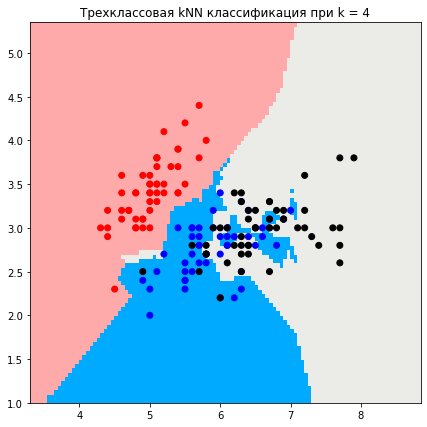

In [64]:
k_n = 4
model = KNN(k_n, 'distance')
model.fit(X_train, y_train)
pred = model.predict(X_test)
print(f'Accuracy: {round(accuracy(pred, y_test), 5)}')
get_graph(X, y, k_n, cmap, model, h=0.05)

Accuracy: 0.78947
Drawing time: 15.35750675201416


<ipython-input-62-734e8efb690c>:38: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


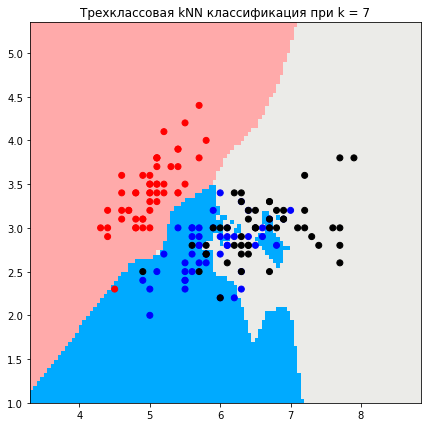

In [65]:
k_n = 7
model = KNN(k_n, 'distance')
model.fit(X_train, y_train)
pred = model.predict(X_test)
print(f'Accuracy: {round(accuracy(pred, y_test), 5)}')
get_graph(X, y, k_n, cmap, model, h=0.05)

Accuracy: 0.73684
Drawing time: 15.628285884857178


<ipython-input-62-734e8efb690c>:38: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


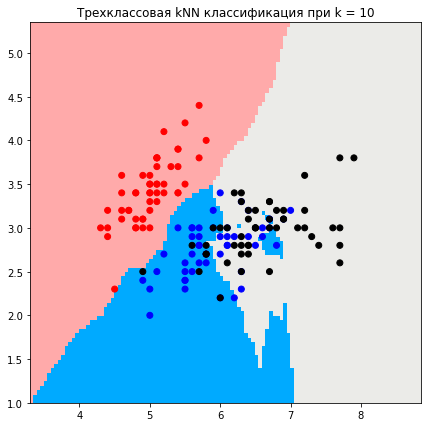

In [66]:
k_n = 10
model = KNN(k_n, 'distance')
model.fit(X_train, y_train)
pred = model.predict(X_test)
print(f'Accuracy: {round(accuracy(pred, y_test), 5)}')
get_graph(X, y, k_n, cmap, model, h=0.05)

Accuracy: 0.71053
Drawing time: 15.572877168655396


<ipython-input-62-734e8efb690c>:38: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


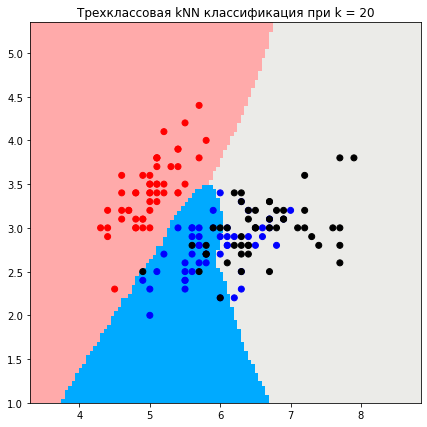

In [67]:
k_n = 20
model = KNN(k_n, 'distance')
model.fit(X_train, y_train)
pred = model.predict(X_test)
print(f'Accuracy: {round(accuracy(pred, y_test), 5)}')
get_graph(X, y, k_n, cmap, model, h=0.05)

В данном случае лучшим по значению метрики `accuracy` оказалась модель с числом ближайших соседей равным 7 (метрика равна 0.789), при этом при увеличении числа соседей ее значение окускается все ниже из-за того, что в процессе предсказания каждой точки учитывается слишком много значений исходных наблюдений, тем самым делая разделение гиперплоскостей более плавным, без выявленных закономерностей, которые присутствуют в данных.

Что лучше априори - вопрос двоякий, ответ на который лежит в посталвенной бизнес задаче. Если необходимо следить за ожидаемыми выбросами, которые присутствуют на в обучении, то выгоднее принимать меньшее количество соседей. Если же необходимо приблизительно понимать тренды, то можно брать модель с числом учитываемых соседей побольше.

Если сравнивать реализации без учитывания весов соседей, то явно видна тенденция на повышение гладкости функции раздела гиперплоскостей. Причем если расстояние между ближайшими точками будет иметь маленькую дисперсию по выборке, то разницы между учитыванием весов по расстояниям и по рангам практически не будет, иначе же выставление весов соседей по рангам может быть более похоже на случай, когда все веса равны 1.

----

4) Для построения требуемой зависимости воспользуемся имеющимися реализациями `kmeans` и `visualize`:

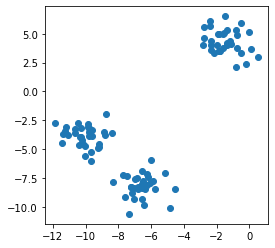

In [145]:
X, y = make_blobs(n_samples=100, random_state=1)
plt.figure(figsize=(4,4))
plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [106]:
def kmeans(data, k, max_iterations, min_distance):
    classes = {i: [] for i in range(k)}
    centroids = [data[i] for i in range(k)]
    
    for _ in range(max_iterations):
        for x in data:
            distances = [e_metrics(x, centroid) for centroid in centroids]
            classification = distances.index(min(distances))
            classes[classification].append(x)
        
        old_centroids = centroids.copy()
        
        for classification in classes:
            centroids[classification] = np.average(classes[classification], axis=0)
            
        optimal = True
        for centroid in range(len(centroids)):
            if np.sum(abs((centroids[centroid] - old_centroids[centroid]) / old_centroids * 100)) > min_distance:
                optimal = False
                
        if optimal:
            break
    
    return old_centroids, classes

def visualize(centroids, classes, colors = ['r', 'g', 'b']):
    
    plt.figure(figsize=(7,7))
    
    for centroid in centroids:
        plt.scatter(centroid[0], centroid[1], marker='x', s=130, c='black')
        
    for class_item in classes:
        for x in classes[class_item]:
            plt.scatter(x[0], x[1], color=colors[class_item])
            
    plt.show()

Создадим метрику среднего среднеквадратичного расстояния в кластерах.

In [99]:
def mean_distance(clusters, centroids):
    dist = np.array([])

    for cluster, points in clusters.items():
        cls_dist = ((points - centroids[cluster])**2).sum(1)**0.5
        dist = np.append(dist, cls_dist)
    return dist.mean()

Сделаем расчет для 10 моделей с различным параметром количества кластеров:

In [76]:
max_iterations = 1
min_distance = 1e-4
max_iterations = 10

In [144]:
dist_dict = dict()

for k in range(1, 11):
    centroids, clusters = kmeans(X, k, max_iterations, min_distance)
    dist_dict[k] = mean_distance(clusters, centroids)


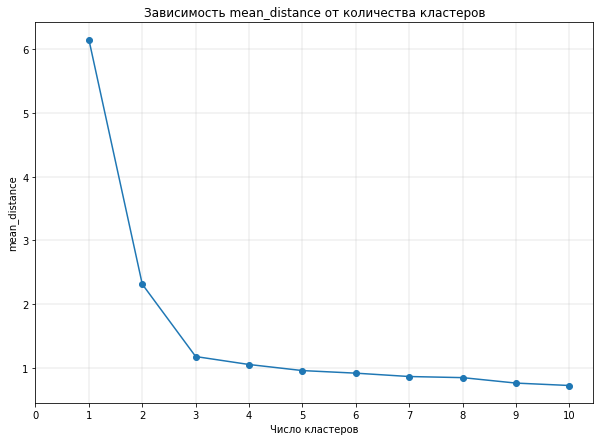

In [143]:
plt.figure(figsize=(10,7))
plt.plot(dist_dict.keys(), dist_dict.values(), marker='o')
# plt.scatter(dist_dict.keys(), dist_dict.values())
plt.title('Зависимость mean_distance от количества кластеров')
plt.xticks(range(11))
plt.grid(linewidth=0.3)
plt.xlabel('Число кластеров')
plt.ylabel('mean_distance')
plt.show()

Таким образом видно, что с ростом числа кластеров уменьшается наша метрика `mean_distance` и будет уменьшаться до нуля (при условии схождения модели) до тех пор, пока числа кластеров не будет равно числу объектов.<br>
Однако видно, что самое резкое изменение происходит при переходе от 2 к 3 кластерам, значит с большой веротяностью 3 кластера - идеальный случай в данной ситуации. Для нагладности можно визуализировать случай, когда количество кластеров равно 6:

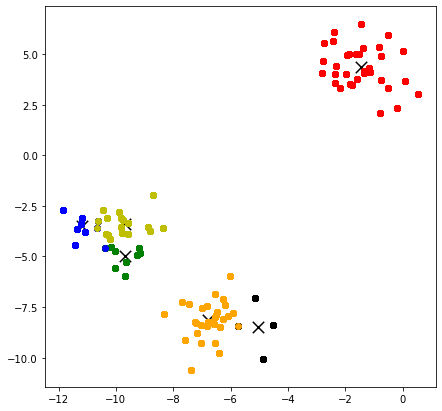

In [108]:
centroids, clusters = kmeans(X, 6, max_iterations, min_distance)
visualize(centroids, clusters, colors=['r', 'g', 'b', 'y', 'black', 'orange'])

И действительно, выглядит не совсем так, как ожидалось.